# Import Dataset

In [1]:
import pandas as pd
# Calculate feature
po_feature = pd.read_csv (r'aac_train_po_cdhi_pos.csv')
ne_feature = pd.read_csv (r'aac_train_ne_cdhi_neg.csv')
# Create class labels
po_class = pd.Series(['positive' for i in range(len(po_feature))])
ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
# Combine po and ne
po_ne_class = pd.concat([po_class, ne_class], axis=0)
po_ne_class.name = 'class'
po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
# Combine feature and class
df_aac = pd.concat([po_ne_feature, po_ne_class], axis=1)
print(df_aac)



      AAC_A  AAC_C  AAC_D  AAC_E  AAC_F  AAC_G  AAC_H  AAC_I  AAC_K  AAC_L  \
0     15.00   0.00   5.00  10.00   0.00   5.00    0.0  10.00  10.00   5.00   
1     30.00   0.00   0.00  30.00   0.00   5.00    0.0   5.00  10.00   0.00   
2     25.00   0.00   8.33   0.00  16.67   8.33    0.0   8.33   8.33  16.67   
3     20.00   0.00   5.00   5.00   0.00  20.00    0.0   0.00   5.00   0.00   
4      7.14  14.29   0.00   7.14   0.00  35.71    0.0   7.14   0.00   0.00   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1882   8.00   0.00   0.00   4.00   4.00   8.00    0.0   0.00   0.00   8.00   
1883  10.00   0.00   5.00  10.00  10.00   5.00    0.0  10.00  10.00   0.00   
1884   5.00   0.00   0.00  15.00   5.00   5.00    0.0  10.00  10.00   0.00   
1885   5.00   0.00   5.00   0.00   0.00   5.00    0.0   5.00  15.00  10.00   
1886   5.00   0.00  10.00   0.00   0.00   5.00    5.0  10.00  10.00  10.00   

      ...  AAC_N  AAC_P  AAC_Q  AAC_R  AAC_S  AAC_T  AAC_V  AAC

In [3]:
df_aac

AAC_A  AAC_C  AAC_D  AAC_E  AAC_F  AAC_G  AAC_H  AAC_I  AAC_K  AAC_L  \
0     15.00   0.00   5.00  10.00   0.00   5.00    0.0  10.00  10.00   5.00   
1     30.00   0.00   0.00  30.00   0.00   5.00    0.0   5.00  10.00   0.00   
2     25.00   0.00   8.33   0.00  16.67   8.33    0.0   8.33   8.33  16.67   
3     20.00   0.00   5.00   5.00   0.00  20.00    0.0   0.00   5.00   0.00   
4      7.14  14.29   0.00   7.14   0.00  35.71    0.0   7.14   0.00   0.00   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1882   8.00   0.00   0.00   4.00   4.00   8.00    0.0   0.00   0.00   8.00   
1883  10.00   0.00   5.00  10.00  10.00   5.00    0.0  10.00  10.00   0.00   
1884   5.00   0.00   0.00  15.00   5.00   5.00    0.0  10.00  10.00   0.00   
1885   5.00   0.00   5.00   0.00   0.00   5.00    0.0   5.00  15.00  10.00   
1886   5.00   0.00  10.00   0.00   0.00   5.00    5.0  10.00  10.00  10.00   

      ...  AAC_N  AAC_P  AAC_Q  AAC_R  AAC_S  AAC_T  AAC_V  AAC_W  AAC_Y  \
0     ...  10.00    0.0   15.0   5.00   5.00   5.00    0.0    0.0   0.00   
1     ...   0.00   15.0    0.0   0.00   0.00   5.00    0.0    0.0   0.00   
2     ...   0.00    0.0    0.0   8.33   0.00   0.00    0.0    0.0   0.00   
3     ...   0.00    0.0   15.0   0.00  10.00   0.00    5.0   10.0   5.00   
4     ...   7.14    0.0    0.0   0.00   7.14   7.14    0.0    0.0   7.14   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1882  ...   0.00   16.0    0.0  20.00  16.00   8.00    8.0    0.0   0.00   
1883  ...   0.00    5.0    5.0   5.00  10.00   5.00    0.0    0.0   5.00   
1884  ...   5.00    5.0   15.0   5.00   0.00  10.00    5.0    0.0   0.00   
1885  ...  15.00    0.0    0.0   0.00   5.00  10.00   15.0    0.0   5.00   
1886  ...   5.00    5.0   10.0   0.00   5.00   5.00    5.0    5.0   5.00   

         class  
0     positive  
1     positive  
2     positive  
3     positive  
4     positive  
...        ...  
1882  negative  
1883  negative  
1884  negative  
1885  negative  
1886  negative  

[3145 rows x 21 columns]

In [4]:
# Assigns the features to X and class label to Y
X = df_aac.drop('class', axis=1)
y = df_aac['class'].copy()

In [5]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [6]:
X.shape

(3145, 20)

In [7]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

AAC_A  AAC_C  AAC_D  AAC_E  AAC_F  AAC_G  AAC_H  AAC_I  AAC_K  AAC_L  \
0     15.00   0.00   5.00  10.00   0.00   5.00    0.0  10.00  10.00   5.00   
1     30.00   0.00   0.00  30.00   0.00   5.00    0.0   5.00  10.00   0.00   
2     25.00   0.00   8.33   0.00  16.67   8.33    0.0   8.33   8.33  16.67   
3     20.00   0.00   5.00   5.00   0.00  20.00    0.0   0.00   5.00   0.00   
4      7.14  14.29   0.00   7.14   0.00  35.71    0.0   7.14   0.00   0.00   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1882   8.00   0.00   0.00   4.00   4.00   8.00    0.0   0.00   0.00   8.00   
1883  10.00   0.00   5.00  10.00  10.00   5.00    0.0  10.00  10.00   0.00   
1884   5.00   0.00   0.00  15.00   5.00   5.00    0.0  10.00  10.00   0.00   
1885   5.00   0.00   5.00   0.00   0.00   5.00    0.0   5.00  15.00  10.00   
1886   5.00   0.00  10.00   0.00   0.00   5.00    5.0  10.00  10.00  10.00   

      AAC_M  AAC_N  AAC_P  AAC_Q  AAC_R  AAC_S  AAC_T  AAC_V  AAC_W  AAC_Y  
0       0.0  10.00    0.0   15.0   5.00   5.00   5.00    0.0    0.0   0.00  
1       0.0   0.00   15.0    0.0   0.00   0.00   5.00    0.0    0.0   0.00  
2       0.0   0.00    0.0    0.0   8.33   0.00   0.00    0.0    0.0   0.00  
3       0.0   0.00    0.0   15.0   0.00  10.00   0.00    5.0   10.0   5.00  
4       0.0   7.14    0.0    0.0   0.00   7.14   7.14    0.0    0.0   7.14  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
1882    0.0   0.00   16.0    0.0  20.00  16.00   8.00    8.0    0.0   0.00  
1883    5.0   0.00    5.0    5.0   5.00  10.00   5.00    0.0    0.0   5.00  
1884    5.0   5.00    5.0   15.0   5.00   0.00  10.00    5.0    0.0   0.00  
1885    5.0  15.00    0.0    0.0   0.00   5.00  10.00   15.0    0.0   5.00  
1886    0.0   5.00    5.0   10.0   0.00   5.00   5.00    5.0    5.0   5.00  

[3145 rows x 20 columns]

In [8]:
# Data split in case independent dataset isn't available
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

In [12]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = df_aac.drop('class', axis=1)
y = df_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  3.64it/s]


In [13]:
# Prints the model performance (Train set)
models_train

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelSpreading                     1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
XGBClassifier                      0.99               0.99    None      0.99   
BaggingClassifier                  0.98               0.98    None      0.98   
NuSVC                              0.95               0.94    None      0.95   
LGBMClassifier                     0.94               0.93    None      0.94   
KNeighborsClassifier               0.75               0.73    None      0.74   
AdaBoostClassifier                 0.73               0.71    None      0.73   
SVC                                0.73               0.68    None      0.71   
QuadraticDiscriminantAnalysis      0.68               0.64    None      0.67   
BernoulliNB                        0.65               0.60    None      0.63   
LinearDiscriminantAnalysis         0.65               0.59    None      0.62   
NearestCentroid                    0.58               0.58    None      0.58   
GaussianNB                         0.59               0.56    None      0.58   
Perceptron                         0.52               0.54    None      0.52   
LogisticRegression                 0.61               0.54    None      0.54   
RidgeClassifier                    0.61               0.54    None      0.54   
LinearSVC                          0.61               0.54    None      0.54   
RidgeClassifierCV                  0.61               0.53    None      0.54   
CalibratedClassifierCV             0.61               0.52    None      0.51   
PassiveAggressiveClassifier        0.54               0.52    None      0.54   
SGDClassifier                      0.54               0.51    None      0.53   
DummyClassifier                    0.51               0.49    None      0.51   

                               matthews_corrcoef  Time Taken  
Model                                                         
LabelSpreading                              1.00        0.67  
RandomForestClassifier                      1.00        0.56  
DecisionTreeClassifier                      1.00        0.07  
ExtraTreeClassifier                         1.00        0.06  
ExtraTreesClassifier                        1.00        0.54  
LabelPropagation                            1.00        0.60  
XGBClassifier                               0.99        0.25  
BaggingClassifier                           0.96        0.20  
NuSVC                                       0.89        0.82  
LGBMClassifier                              0.88        0.18  
KNeighborsClassifier                        0.47        0.46  
AdaBoostClassifier                          0.44        0.37  
SVC                                         0.45        0.59  
QuadraticDiscriminantAnalysis               0.31        0.06  
BernoulliNB                                 0.23        0.06  
LinearDiscriminantAnalysis                  0.22        0.06  
NearestCentroid                             0.16        0.05  
GaussianNB                                  0.12        0.06  
Perceptron                                  0.08        0.05  
LogisticRegression                          0.11        0.06  
RidgeClassifier                             0.11        0.06  
LinearSVC                                   0.11        0.34  
RidgeClassifierCV                           0.10        0.06  
CalibratedClassifierCV                      0.10        1.29  
PassiveAggressiveClassifier                 0.05        0.06  
SGDClassi

In [9]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = df_aac.drop('class', axis=1)
y = df_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
#models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

/home/lazyrook/anaconda3/envs/lazypredict/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:06<00:00,  4.70it/s]


In [10]:
# Prints the model performance (Test set)
models_test

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.72               0.69    None      0.71   
XGBClassifier                      0.70               0.68    None      0.70   
RandomForestClassifier             0.72               0.68    None      0.70   
AdaBoostClassifier                 0.70               0.67    None      0.69   
ExtraTreesClassifier               0.70               0.65    None      0.68   
BaggingClassifier                  0.68               0.64    None      0.66   
DecisionTreeClassifier             0.64               0.63    None      0.64   
QuadraticDiscriminantAnalysis      0.66               0.62    None      0.64   
LinearDiscriminantAnalysis         0.65               0.60    None      0.62   
BernoulliNB                        0.64               0.59    None      0.62   
LabelPropagation                   0.60               0.58    None      0.60   
LabelSpreading                     0.60               0.57    None      0.60   
NuSVC                              0.59               0.57    None      0.59   
KNeighborsClassifier               0.59               0.56    None      0.58   
NearestCentroid                    0.56               0.55    None      0.57   
ExtraTreeClassifier                0.57               0.55    None      0.57   
SVC                                0.62               0.54    None      0.55   
GaussianNB                         0.58               0.54    None      0.57   
LogisticRegression                 0.61               0.54    None      0.55   
CalibratedClassifierCV             0.62               0.54    None      0.53   
RidgeClassifier                    0.61               0.53    None      0.54   
RidgeClassifierCV                  0.61               0.53    None      0.54   
LinearSVC                          0.61               0.53    None      0.54   
PassiveAggressiveClassifier        0.54               0.53    None      0.54   
Perceptron                         0.49               0.52    None      0.49   
DummyClassifier                    0.52               0.50    None      0.52   
SGDClassifier                      0.52               0.48    None      0.51   

                               matthews_corrcoef  Time Taken  
Model                                                         
LGBMClassifier                              0.40        0.16  
XGBClassifier                               0.37        0.27  
RandomForestClassifier                      0.39        0.51  
AdaBoostClassifier                          0.35        0.38  
ExtraTreesClassifier                        0.35        0.46  
BaggingClassifier                           0.31        0.17  
DecisionTreeClassifier                      0.25        0.04  
QuadraticDiscriminantAnalysis               0.26        0.03  
LinearDiscriminantAnalysis                  0.23        0.05  
BernoulliNB                                 0.21        0.07  
LabelPropagation                            0.16        0.38  
LabelSpreading                              0.15        0.45  
NuSVC                                       0.14        0.65  
KNeighborsClassifier                        0.12        0.14  
NearestCentroid                             0.11        0.02  
ExtraTreeClassifier                         0.10        0.03  
SVC                                         0.13        0.43  
GaussianNB                                  0.09        0.03  
LogisticRegression                          0.10        0.04  
CalibratedClassifierCV                      0.14        1.24  
RidgeClassifier                             0.10        0.03  
RidgeClassifierCV                           0.10        0.03  
LinearSVC                                   0.10        0.33  
PassiveAggressiveClassifier                 0.06        0.04  
Perceptron                                  0.03        0.03  
DummyClas

In [14]:
y_test

681     positive
1839    negative
1869    negative
1584    negative
1136    negative
          ...   
975     negative
387     negative
641     negative
531     positive
201     negative
Name: class, Length: 629, dtype: object

[(0.0, 1.0)]

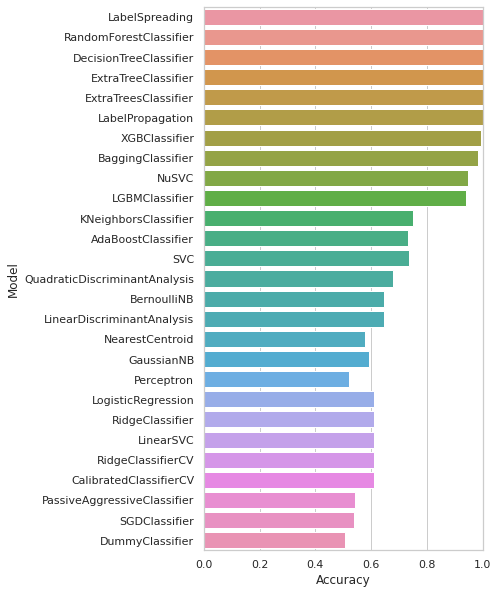

In [15]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

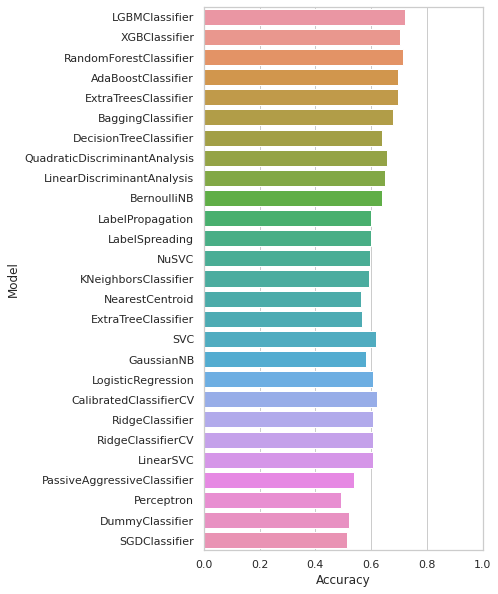

In [16]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_test.index, x="Accuracy", data=models_test)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

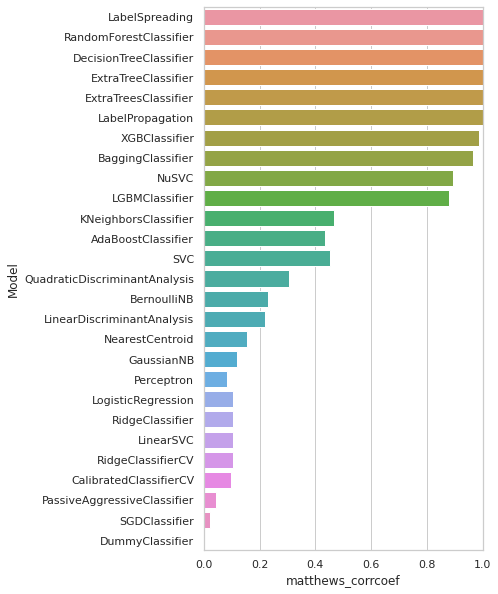

In [17]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

In [18]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_test.index, x="matthews_corrcoef", data=models_test)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

# Random Forest

In [19]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [20]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [21]:
df_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1882    negative
1883    negative
1884    negative
1885    negative
1886    negative
Name: class, Length: 3145, dtype: object

In [22]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.7281399046104928

In [23]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7281399046104928

In [24]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.4190888332810627

In [25]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[329,  48],
       [123, 129]])

In [26]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

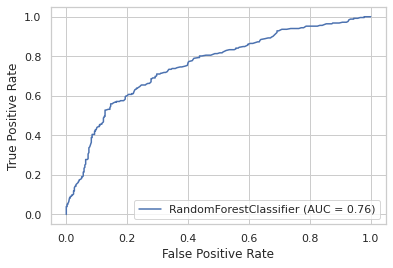

In [27]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

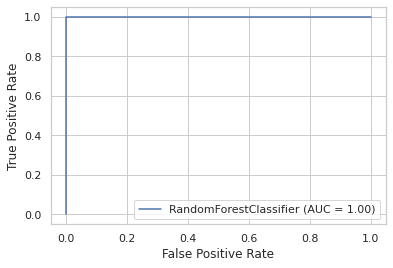

In [28]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

# Feature importance

In [29]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

AAC_A  AAC_C  AAC_D  AAC_E  AAC_F  AAC_G  AAC_H  AAC_I  AAC_K  AAC_L  \
0     15.00   0.00   5.00  10.00   0.00   5.00   0.00  10.00  10.00   5.00   
1     30.00   0.00   0.00  30.00   0.00   5.00   0.00   5.00  10.00   0.00   
2     25.00   0.00   8.33   0.00  16.67   8.33   0.00   8.33   8.33  16.67   
3     20.00   0.00   5.00   5.00   0.00  20.00   0.00   0.00   5.00   0.00   
4      7.14  14.29   0.00   7.14   0.00  35.71   0.00   7.14   0.00   0.00   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1882   8.00   0.00   0.00   4.00   4.00   8.00   0.00   0.00   0.00   8.00   
1883  10.00   0.00   5.00  10.00  10.00   5.00   0.00  10.00  10.00   0.00   
1884   5.00   0.00   0.00  15.00   5.00   5.00   0.00  10.00  10.00   0.00   
1885   5.00   0.00   5.00   0.00   0.00   5.00   0.00   5.00  15.00  10.00   
1886   5.00   0.00  10.00   0.00   0.00   5.00   5.00  10.00  10.00  10.00   

      AAC_M  AAC_N  AAC_P  AAC_Q  AAC_R  AAC_S  AAC_T  AAC_V  AAC_W  AAC_Y  
0      0.00  10.00   0.00  15.00   5.00   5.00   5.00   0.00   0.00   0.00  
1      0.00   0.00  15.00   0.00   0.00   0.00   5.00   0.00   0.00   0.00  
2      0.00   0.00   0.00   0.00   8.33   0.00   0.00   0.00   0.00   0.00  
3      0.00   0.00   0.00  15.00   0.00  10.00   0.00   5.00  10.00   5.00  
4      0.00   7.14   0.00   0.00   0.00   7.14   7.14   0.00   0.00   7.14  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
1882   0.00   0.00  16.00   0.00  20.00  16.00   8.00   8.00   0.00   0.00  
1883   5.00   0.00   5.00   5.00   5.00  10.00   5.00   0.00   0.00   5.00  
1884   5.00   5.00   5.00  15.00   5.00   0.00  10.00   5.00   0.00   0.00  
1885   5.00  15.00   0.00   0.00   0.00   5.00  10.00  15.00   0.00   5.00  
1886   0.00   5.00   5.00  10.00   0.00   5.00   5.00   5.00   5.00   5.00  

[3145 rows x 20 columns]

In [30]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [31]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

Feature  Gini
0    AAC_A  0.06
1    AAC_C  0.03
2    AAC_D  0.07
3    AAC_E  0.05
4    AAC_F  0.05
5    AAC_G  0.06
6    AAC_H  0.03
7    AAC_I  0.05
8    AAC_K  0.06
9    AAC_L  0.07
10   AAC_M  0.03
11   AAC_N  0.05
12   AAC_P  0.05
13   AAC_Q  0.05
14   AAC_R  0.05
15   AAC_S  0.06
16   AAC_T  0.06
17   AAC_V  0.06
18   AAC_W  0.02
19   AAC_Y  0.04

In [32]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance')